# **Loading the Data and Summary Statistics and Time-Series Plot**


         Date  Close   Open   High    Low   Volume Change %
0  2024-08-01  156.3  159.3  159.4  156.1   79.15M   -2.56%
1  2024-07-31  160.4  158.2  160.7  158.1  173.91M    1.07%
2  2024-07-30  158.7  158.8  159.2  158.0  138.14M   -0.63%
3  2024-07-29  159.7  158.7  160.2  158.4  126.28M    1.14%
4  2024-07-26  157.9  159.3  159.6  157.9  155.08M   -0.13%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9202 non-null   object 
 1   Close     9202 non-null   float64
 2   Open      9202 non-null   float64
 3   High      9202 non-null   float64
 4   Low       9202 non-null   float64
 5   Volume    9202 non-null   object 
 6   Change %  9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB
None
             Close         Open         High          Low
count  9202.000000  9202.000000  9202.000000  9202.000000
mean    

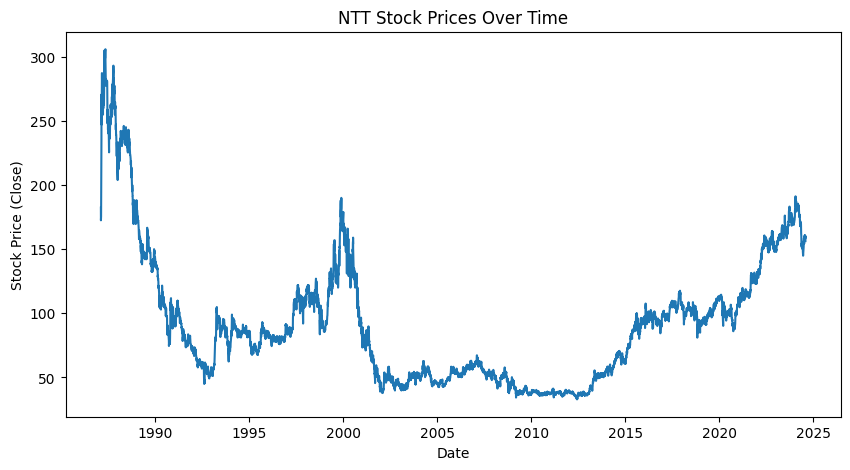

In [ ]:
import pandas as pd

# Load the stock price data
file_path = '/content/stock_price_english_trns.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Check the first few rows and basic info of the dataset
print(data.head())
print(data.info())

import matplotlib.pyplot as plt

# Basic statistics
print(data.describe())

# Plotting the stock price over time
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plotting closing price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('NTT Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.show()




# **Data Preprocessing and Feature Engineering**

**Handling Missing *Values***

In [ ]:
# Handling missing values (for simplicity, forward fill any missing data)
data.fillna(method='ffill', inplace=True)


<ipython-input-13-42ac28f4178a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


**Feature Engineering-Moving Averages**

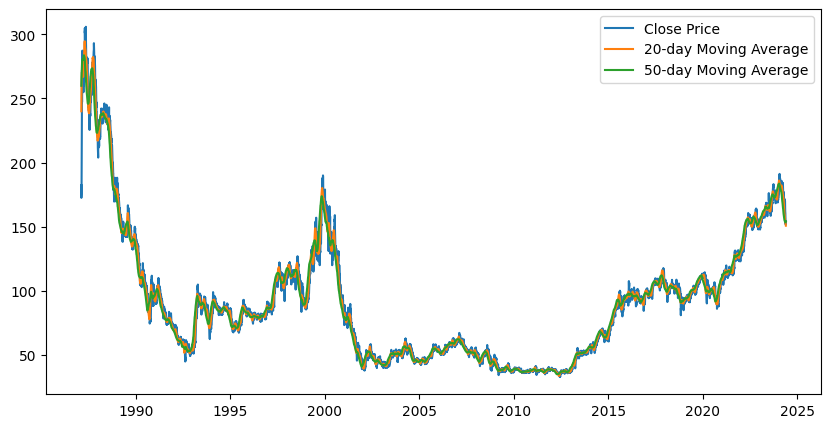

In [ ]:
# Adding moving averages as features
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)  # Remove rows with NaN values from moving averages

# Visualize new features
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-day Moving Average')
plt.plot(data['SMA_50'], label='50-day Moving Average')
plt.legend()
plt.show()


# **Model Selection and Training - LSTM(best for time series analysis)**

**Preparing the Data for LSTM**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create training and test sets (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


**Building and Training the LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20)


Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0040
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 1.5940e-04
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 1.5899e-04
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 1.3204e-04
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 1.1233e-04
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 1.1136e-04
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - loss: 1.0142e-04
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 9.1254e-05
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 8.6534e-05
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 7.9289e-05
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 7.2163e-05
Epoch 12/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 7.3344e-05
Epoch 13/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 6.9902e-05
Epoch 14/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/s

# **Model Evaluation and Results Analysis: Mean Squared Error (MSE)**

**Making Predictions**

In [ ]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Undo scaling
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


227/227 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error for train and test
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Train MSE: 3.078370879166129
Test MSE: 17.54811860406829


**Plotting Predictions vs Actual**

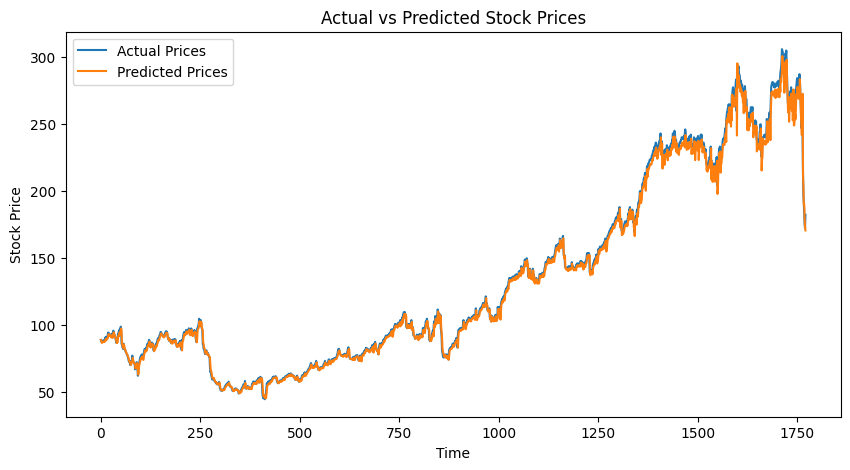

In [ ]:
# Plot the test predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# **Improving measures and retraining model**

In [28]:
model.fit(x_train, y_train, batch_size=32, epochs=35)



Epoch 1/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - loss: 99925040.0000
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - loss: 101714784.0000
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 100812632.0000
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 102180920.0000
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 102838488.0000
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 100912432.0000
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 103344008.0000
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 102410432.0000
Epoch 9/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 101138136.0000
Epoch 10/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 103433072.0000
Epoch 11/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 101002128.0000
Epoch 12/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 100460736.0000
Epoch 13/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 100449144.

**Making Predictions**

In [33]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Undo scaling
train_predictionsR = scaler.inverse_transform(train_predictions)
y_trainR = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictionsR = scaler.inverse_transform(test_predictions)
y_testR = scaler.inverse_transform(y_test.reshape(-1, 1))


227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


**Evaluation Metrics**

In [34]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error for train and test
train_mse = mean_squared_error(y_trainR, train_predictionsR)
test_mse = mean_squared_error(y_testR, test_predictionsR)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Train MSE: 3.2601546842631035e+18
Test MSE: 9.468208798397182e+18
